# Se voglio ricostruire una coppia di elettroni di carica opposta come faccio?


(0, '--2023-12-15 10:13:09--  https://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root\nResolving github.com (github.com)... 140.82.121.3\nConnecting to github.com (github.com)|140.82.121.3|:443... connected.\nHTTP request sent, awaiting response... 302 Found\nLocation: https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root [following]\n--2023-12-15 10:13:09--  https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root\nResolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...\nConnecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.\nHTTP request sent, awaiting response... 200 OK\nLength: 2152475 (2.1M) [application/octet-stream]\nSaving to: ‘DYJets.root’\n\n     0K .......... .......... .......... 

Welcome to JupyROOT 6.26/00
None
Collection name='THashList', class='THashList', size=1
 TKey Name = trees, Title = trees, Cycle = 1
None
Collection name='THashList', class='THashList', size=1
 TKey Name = events, Title = events, Cycle = 1
******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6071498 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :muontracks_size : muontracks_size/I                                *
*Entries :    10000 : Total  Size=      40693 bytes  File Size  =       6331 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   6.34     *
*............................................................................*
*Br    1 :muontracks_pt : vector<float>          

array('i', [2])
array('i', [0])
2
{ 53.3174f, 44.2132f }


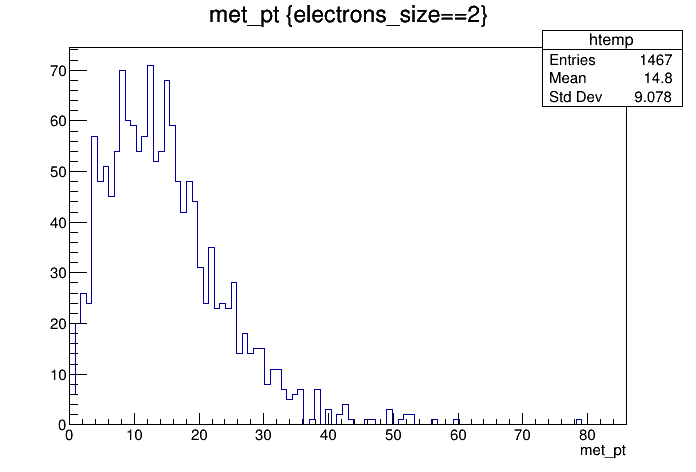

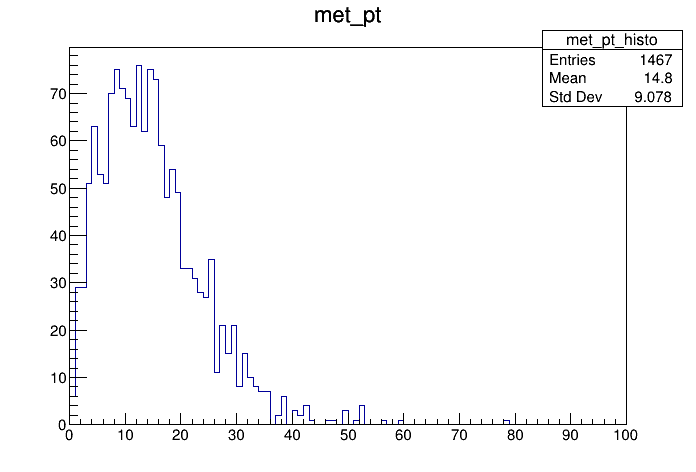

***********************************************
*    Row   * Instance * electrons * electrons *
***********************************************
*        2 *        0 *         2 *        -1 *
*        2 *        1 *         2 *         1 *
*       11 *        0 *         2 *         1 *
*       11 *        1 *         2 *        -1 *
*       13 *        0 *         2 *         1 *
*       13 *        1 *         2 *        -1 *
*       24 *        0 *         2 *         1 *
*       24 *        1 *         2 *        -1 *
*       32 *        0 *         2 *        -1 *
*       32 *        1 *         2 *         1 *
*       34 *        0 *         2 *         1 *
*       34 *        1 *         2 *        -1 *
*       39 *        0 *         2 *        -1 *
*       39 *        1 *         2 *         1 *
*       62 *        0 *         2 *         1 *
*       62 *        1 *         2 *        -1 *
*       65 *        0 *         2 *         1 *
*       65 *        1 *         2 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or 

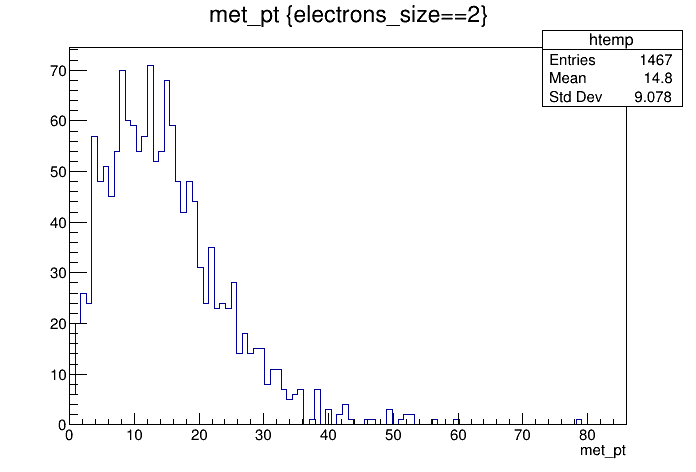

2584


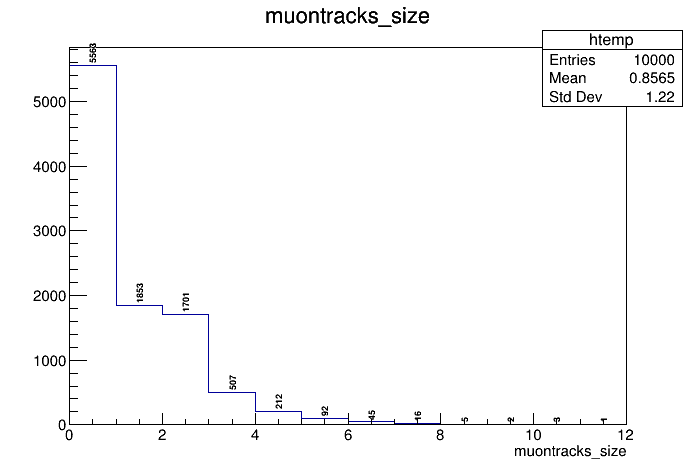

0.4465789794559582 1488.4477385267087
377.55226147329125


In [2]:
#Prima cosa: giriamo il notebook precedente 
%run ./trees_and_ntuples.ipynb

In [3]:
#Non solo l'output, anche il tree è presente!
mytree
mytree.GetEntries()

10000

## Ora facciamo un loop sugli eventi!

In [22]:
mytree.Print("genlep*")

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6072486 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :genlep_pt : vector<float>                                          *
*Entries :    10000 : Total  Size=     221315 bytes  File Size  =      84345 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression=   2.62     *
*............................................................................*
*Br    1 :genlep_eta : vector<float>                                         *
*Entries :    10000 : Total  Size=     221328 bytes  File Size  =     109092 *
*Baskets :        9 : Basket Size=      32000 bytes  Compression=   2.02     *
*...................................................

In [28]:
#h_jet_mass = ROOT.TH1F("Jets_mass_0","Leading jet mass",100,0,100) 
%jsroot on
nPairs_per_event = ROOT.TH1F("nPairs","nPairs",6,-0.5,5.5) 
muon_pair_mass =ROOT.TH1F("mumu_mass","Z candidate mass",120,0,120)
muon_pair_mass_os =ROOT.TH1F("mumu_mass_os","Z candidate mass, os leptons",120,0,120)
muon_pair_mass_ss =ROOT.TH1F("mumu_mass_ss","Z candidate mass, ss leptons",120,0,120)
for i in range (mytree.GetEntries()):
    mytree.GetEntry(i)
    counter=0

    if(i%1000==0):print("Event #" ,i, " n muons: ", mytree.muontracks_size)
    if(mytree.muontracks_size>0):
        for l in range(mytree.genlep_pt.size()):
            if (mytree.genlep_id[l]==13):
                print("there is a muon in the event! Eta, phi, and pt are", mytree.genlep_eta[l], mytree.genlep_phi[l], mytree.genlep_pt[l])
        for m in range(mytree.muontracks_size):
            #if(i%1000==0):print("muon # ", m, " charge is: ", mytree.muontracks_charge[m])
            #qui definisco il quadrimpulso del muone m-esimo
            p1 = ROOT.TLorentzVector()
            p1.SetPtEtaPhiE(mytree.muontracks_pt[m],mytree.muontracks_eta[m],mytree.muontracks_phi[m],mytree.muontracks_e[m])
            for n in range(m):
                #qui definisco il quadrimpulso del muone n-esimo
                p2 = ROOT.TLorentzVector()
                p2.SetPtEtaPhiE(mytree.muontracks_pt[n],mytree.muontracks_eta[n],mytree.muontracks_phi[n],mytree.muontracks_e[n])
                pZ = p1+p2
                mZ = pZ.M()
                muon_pair_mass.Fill(mZ)

                if(mytree.muontracks_charge[m]*mytree.muontracks_charge[n])<0:
                    #qui faccio la somma dei quadrimomenti dei muoni
                    counter+=1
                    muon_pair_mass_os.Fill(mZ)
                    
                    #z_mass_window_cut = mZ < 95 and mZ >85
                if(mytree.muontracks_charge[m]*mytree.muontracks_charge[n])>0:
                    muon_pair_mass_ss.Fill(mZ)

    nPairs_per_event.Fill(counter)
        
cp = ROOT.TCanvas()
cp.Draw()
#nPairs_per_event.Draw()
muon_pair_mass.Draw()
muon_pair_mass_ss.SetLineColor(ROOT.kGreen+2)
muon_pair_mass_ss.Draw("same")    
muon_pair_mass_os.SetLineColor(ROOT.kRed)
muon_pair_mass_os.Draw("same")    
      
    #Ogni 100 eventi stampo a schermo il vettore dei jet!
    
    
'''    
    if(i%1000==0):print( "event #", i, "n jets ",mytree.jets_size, " pt: ",mytree.jets_pt)
    #Se c'è almeno 1 jet: stampo il 
    if(mytree.jets_size):
            jet_0 =ROOT.TLorentzVector()
            jet_0.SetPtEtaPhiE(mytree.jets_pt[0],mytree.jets_eta[0],mytree.jets_phi[0],mytree.jets_e[0])
            if(i%1000==0):print("leading jet pt",mytree.jets_pt[0]," mass? ",jet_0.M())
            h_jet_mass.Fill(jet_0.M())
              '''

Event # 0  n muons:  2
there is a muon in the event! Eta, phi, and pt are 1.8400040864944458 1.8953710794448853 47.9608039855957
there is a muon in the event! Eta, phi, and pt are -2.868488073348999 2.002765655517578 30.646480560302734
there is a muon in the event! Eta, phi, and pt are 0.34884870052337646 3.127291440963745 45.0842170715332
there is a muon in the event! Eta, phi, and pt are 2.2004947662353516 0.2623276710510254 34.72300338745117
there is a muon in the event! Eta, phi, and pt are -1.4926010370254517 -2.5786712169647217 25.12808609008789
there is a muon in the event! Eta, phi, and pt are -4.0902509689331055 -2.347094774246216 12.565835952758789
there is a muon in the event! Eta, phi, and pt are -2.8182525634765625 -1.8769419193267822 6.124151706695557
there is a muon in the event! Eta, phi, and pt are 2.3098342418670654 1.5529879331588745 137.28164672851562
there is a muon in the event! Eta, phi, and pt are 1.3660873174667358 1.4044855833053589 45.65146255493164
there is 

there is a muon in the event! Eta, phi, and pt are -0.5994517207145691 -2.887300729751587 24.708005905151367
there is a muon in the event! Eta, phi, and pt are -2.13017201423645 -0.19050747156143188 43.5815315246582
there is a muon in the event! Eta, phi, and pt are -0.29607659578323364 2.9590487480163574 39.38258743286133
there is a muon in the event! Eta, phi, and pt are 0.3497580587863922 2.3803300857543945 19.277956008911133
there is a muon in the event! Eta, phi, and pt are 1.5097516775131226 -1.442504644393921 38.98082733154297
there is a muon in the event! Eta, phi, and pt are 3.272226333618164 -0.7787477970123291 53.866477966308594
there is a muon in the event! Eta, phi, and pt are 2.069380283355713 -1.0648796558380127 13.916924476623535
there is a muon in the event! Eta, phi, and pt are 4.664519309997559 0.9825882911682129 5.224599361419678
there is a muon in the event! Eta, phi, and pt are -2.9154443740844727 -1.4498289823532104 43.134090423583984
there is a muon in the event

there is a muon in the event! Eta, phi, and pt are 1.1660147905349731 -2.7391576766967773 27.600751876831055
there is a muon in the event! Eta, phi, and pt are 2.041980504989624 0.6593248248100281 88.65340423583984
there is a muon in the event! Eta, phi, and pt are 4.423076152801514 -0.8131685853004456 13.270784378051758
there is a muon in the event! Eta, phi, and pt are -2.129333972930908 1.6417630910873413 34.49329376220703
there is a muon in the event! Eta, phi, and pt are -3.513279676437378 1.8474913835525513 17.18267250061035
there is a muon in the event! Eta, phi, and pt are 1.8781713247299194 -0.8942664265632629 20.186996459960938
there is a muon in the event! Eta, phi, and pt are 1.462032437324524 -0.9217342734336853 43.41778564453125
there is a muon in the event! Eta, phi, and pt are -0.04403681680560112 2.657597303390503 40.71498107910156
there is a muon in the event! Eta, phi, and pt are 2.916405200958252 -2.651001453399658 35.128318786621094
there is a muon in the event! Et

there is a muon in the event! Eta, phi, and pt are -3.426227569580078 0.9203728437423706 34.3138542175293
there is a muon in the event! Eta, phi, and pt are -4.159817695617676 -2.0945911407470703 18.058937072753906
there is a muon in the event! Eta, phi, and pt are -1.6484211683273315 -1.446496605873108 51.982791900634766
there is a muon in the event! Eta, phi, and pt are 0.6283251643180847 -2.6510260105133057 15.73611831665039
there is a muon in the event! Eta, phi, and pt are -1.1265289783477783 1.216719627380371 58.694618225097656
there is a muon in the event! Eta, phi, and pt are -3.970402479171753 -1.5096243619918823 19.151540756225586
there is a muon in the event! Eta, phi, and pt are -2.2277779579162598 -2.325495958328247 27.646724700927734
there is a muon in the event! Eta, phi, and pt are 4.133787631988525 -2.6321866512298584 39.20016098022461
there is a muon in the event! Eta, phi, and pt are 2.0899527072906494 0.9408642649650574 45.35081100463867
there is a muon in the event

there is a muon in the event! Eta, phi, and pt are 0.876518726348877 -2.238060474395752 30.854663848876953
there is a muon in the event! Eta, phi, and pt are -2.519303560256958 -2.2711870670318604 16.31643295288086
there is a muon in the event! Eta, phi, and pt are -0.20100127160549164 -1.1381235122680664 47.33466720581055
there is a muon in the event! Eta, phi, and pt are 2.4035303592681885 2.428180694580078 26.968385696411133
there is a muon in the event! Eta, phi, and pt are 3.7920143604278564 2.325415849685669 30.565282821655273
there is a muon in the event! Eta, phi, and pt are -5.084322452545166 -2.0905961990356445 16.06064796447754
there is a muon in the event! Eta, phi, and pt are -3.1796998977661133 1.3173693418502808 40.007076263427734
there is a muon in the event! Eta, phi, and pt are -0.8487913608551025 -1.593832015991211 15.587688446044922
there is a muon in the event! Eta, phi, and pt are 1.2605913877487183 1.3286371231079102 15.207226753234863
there is a muon in the even

'    \n    if(i%1000==0):print( "event #", i, "n jets ",mytree.jets_size, " pt: ",mytree.jets_pt)\n    #Se c\'è almeno 1 jet: stampo il \n    if(mytree.jets_size):\n            jet_0 =ROOT.TLorentzVector()\n            jet_0.SetPtEtaPhiE(mytree.jets_pt[0],mytree.jets_eta[0],mytree.jets_phi[0],mytree.jets_e[0])\n            if(i%1000==0):print("leading jet pt",mytree.jets_pt[0]," mass? ",jet_0.M())\n            h_jet_mass.Fill(jet_0.M())\n              '

Warning in <TFile::Append>: Replacing existing TH1: nPairs (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mumu_mass (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mumu_mass_os (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: mumu_mass_ss (Potential memory leak).


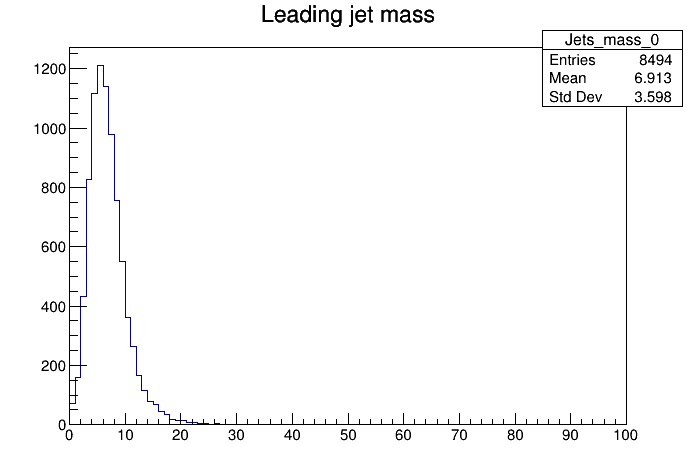

In [25]:
#Diseg
c1= ROOT.TCanvas()
c1.Draw()
h_jet_mass.Draw()





## Esercizio 1:

Proviamo a fare la somma vettoriale  di due elettroni di carica opposta e disegnarne la massa.
Facciamo lo stesso coi muoni.

### 1.1 Che forma ha questa distribuzione

### 1.2 Quante coppie avrò per evento?


## Esercizio 2: 

Proviamo a fittare con qualche funzione. Esponenziale + gaussiana? Esponenziale + ??